# Modelos de Regresión Lineal 

## Modelo con datos simulados

* y = a + b * x
* X : 100 valores con distribución N(1.5, 2.5)
* Ye = 3 + 1.5 * x + e 
* e estará distribuida de forma N(0,0.8)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.rand(100)

In [3]:
error = 0 + 0.4 * np.random.randn(100)

In [4]:
y_esperada = 3 + 1.5 * x

In [5]:
y_actual = 3 + 1.5 * x + error

In [6]:
x_list = x.tolist()
y_esp_list = y_esperada.tolist()
y_actual_list = y_actual.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list, 
        "y_actual": y_actual_list, 
        "y_esperada": y_esp_list
    }

)

In [8]:
data.head()

,x,y_actual,y_esperada
0,2.738403,6.740911,7.107605
1,3.438680,8.138344,8.158020
2,1.677178,5.437324,5.515767
3,2.702101,7.265693,7.053152
4,3.934494,8.812567,8.901741


In [9]:
# podemos hallar la media también para dibujarla de la siguiente manera: 
y_mean = [np.mean(y_actual) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual versus esperado')

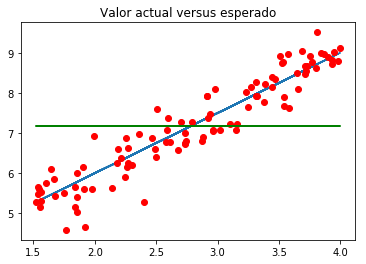

In [36]:
%matplotlib inline
plt.plot(data["x"], data["y_esperada"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.title("Valor actual versus esperado")

## ¿Cómo es la predicción de buena?

* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto a su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar. 

* R²= SSR / SST : Coeficiente de determinación, entre 0 y 1. Entre más cerca al 1, mejor! 

In [11]:
# vamos a realizar los calculos de SSR, SST, y SSD que son las sumas de los cuadrados para validar el error:
data["SSR"] = (data["y_esperada"]-np.mean(y_actual))**2
data["SSD"] = (data["y_esperada"] - data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_actual))**2

In [12]:
data.head()

,x,y_actual,y_esperada,SSR,SSD,SST
0,2.738403,6.740911,7.107605,0.003080,0.134464,0.178247
1,3.438680,8.138344,8.158020,0.989858,0.000387,0.951092
2,1.677178,5.437324,5.515767,2.713720,0.006153,2.978319
3,2.702101,7.265693,7.053152,0.012090,0.045174,0.010524
4,3.934494,8.812567,8.901741,3.022859,0.007952,2.720726


In [13]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
SSR

131.0683053291996

In [15]:
SSD

17.574841789578556

In [16]:
SST

156.9231418651692

In [17]:
## Hacemos uno de los criterios de validación del modelo que es R2. 
R2 = SSR/SST
R2

0.8352388549664365

(array([ 3.,  8., 12., 22., 24., 15.,  9.,  4.,  1.,  2.]),
 array([-0.94938365, -0.7223758 , -0.49536796, -0.26836011, -0.04135227,
         0.18565558,  0.41266343,  0.63967127,  0.86667912,  1.09368696,
         1.32069481]),
 <a list of 10 Patch objects>)

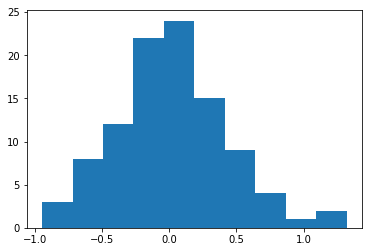

In [18]:
plt.hist((data["y_esperada"] - data["y_actual"]))

## Obteniendo la recta de la regresión

* y = a + b * x_m
* b = sum((xi-x_m)*(yi-y_m)/(xi-x_m)²)
* a = y_m - b * x_m

In [20]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(2.7918005428583554, 7.163104342100078)

In [25]:
data["beta_num"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_den"] = (data["x"]-x_mean)**2

In [26]:
beta =  sum(data["beta_num"])/sum(data["beta_den"])
alpha = y_mean - beta * x_mean

In [27]:
alpha, beta

(2.8411335095712067, 1.5480944165530774)

El modelo lineal obtenido por regresión es: 
    

<b>Y = 2.8411335095712067 + 1.5480944165530774 * X </b>

In [28]:
data["y_model"] = alpha + beta*data["x"]

In [29]:
data.head()

,x,y_actual,y_esperada,SSR,SSD,SST,beta_num,beta_den,y_model
0,2.738403,6.740911,7.107605,0.003080,0.134464,0.178247,0.022544,0.002851,7.080440
1,3.438680,8.138344,8.158020,0.989858,0.000387,0.951092,0.630863,0.418453,8.164535
2,1.677178,5.437324,5.515767,2.713720,0.006153,2.978319,1.923594,1.242383,5.437563
3,2.702101,7.265693,7.053152,0.012090,0.045174,0.010524,-0.009202,0.008046,7.024241
4,3.934494,8.812567,8.901741,3.022859,0.007952,2.720726,1.884830,1.305749,8.932102


In [31]:
# vamos a realizar los calculos de SSR, SST, y SSD que son las sumas de los cuadrados para validar el error:SSR_mode =  (data["y_esperada"]-np.mean(y_actual))**2
SSR_m = sum((data["y_model"]-y_mean)**2)
SSD_m = sum((data["y_model"] - data["y_actual"])**2)
SST_m = sum((data["y_actual"]-np.mean(y_actual))**2)

In [32]:
SSR_m, SSD_m, SST_m

(139.5434789901309, 17.37966287503834, 156.9231418651692)

In [33]:
## Hacemos uno de los criterios de validación del modelo que es R2. 
R2 = SSR_m/SST_m
R2

0.8892472922191986

Text(0.5, 1.0, 'Valor actual versus esperado')

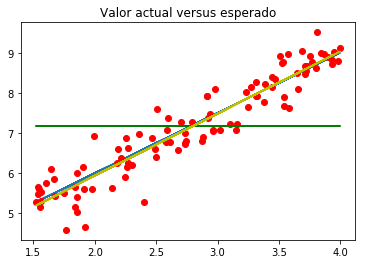

In [38]:
y_mean = [np.mean(y_actual) for i in range(1, len(x_list)+1)]
%matplotlib inline
plt.plot(data["x"], data["y_esperada"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"], "y")
plt.title("Valor actual versus esperado")

## Error estándar de los residuos (RSE) 

Entre menor sea este valor, mucho mejor es el modelo.

* Se compara este valor con el promedio de los valores actuales, es la mejor forma. 
    * si decidimos hacerlo así, para calcular el error en porcentaje se dividie RSE/promedio_modelo

In [41]:
RSE = np.sqrt((SSD_m)/(len(data)-2))
RSE

0.4211217148579268

In [43]:
media_modelo = np.mean(data["y_actual"])

In [45]:
RSE/media_modelo   # lo que da un 5,87 % de error 

0.05879039236980631